In [1]:
from dataset_utils import *
from model_utils import *
from eval_utils import *

# Load data and apply data augmentation

In [2]:
x_train, y_train, x_val, y_val, x_test, y_test = load_and_preprocess_data()
train_dataset = augment_dataset(x_train,y_train)

# Model Evaluation

## Model training without Regularization

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


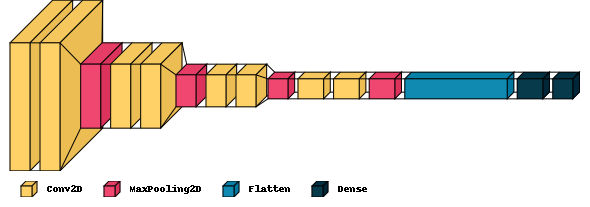

In [3]:
# Model creation and visualization
model = create_model()
model.summary()
visualize_model(model)

In [4]:
# Training
history = train_model(model, train_dataset=train_dataset,x_val=x_val, y_val=y_val)

Epoch 1/50
704/704 [==============================] - 11s 13ms/step - loss: 1.9216 - accuracy: 0.2762 - val_loss: 1.5527 - val_accuracy: 0.4210
Epoch 2/50
704/704 [==============================] - 8s 12ms/step - loss: 1.4960 - accuracy: 0.4491 - val_loss: 1.2818 - val_accuracy: 0.5324
Epoch 3/50
704/704 [==============================] - 8s 11ms/step - loss: 1.2888 - accuracy: 0.5326 - val_loss: 1.1610 - val_accuracy: 0.5772
Epoch 4/50
704/704 [==============================] - 9s 12ms/step - loss: 1.1530 - accuracy: 0.5843 - val_loss: 1.0659 - val_accuracy: 0.6188
Epoch 5/50
704/704 [==============================] - 8s 12ms/step - loss: 1.0352 - accuracy: 0.6298 - val_loss: 0.9566 - val_accuracy: 0.6524
Epoch 6/50
704/704 [==============================] - 9s 12ms/step - loss: 0.9613 - accuracy: 0.6590 - val_loss: 0.8807 - val_accuracy: 0.6884
Epoch 7/50
704/704 [==============================] - 8s 12ms/step - loss: 0.8959 - accuracy: 0.6836 - val_loss: 0.8233 - val_accuracy: 0.704

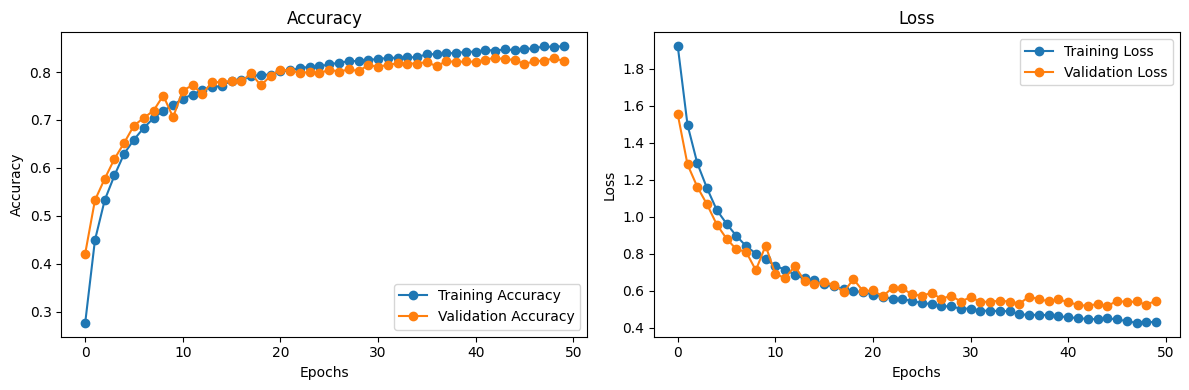

In [5]:
# Training/Validation Curves
plot_history(history)

In [6]:
# Accuracy evaluation
evaluate_model(model, x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.5591 - accuracy: 0.8179
Test Loss: 0.5590651035308838, Test Accuracy: 0.8179000020027161


In [7]:
# Precision, recall, and F1 score
evaluation_report(model, x_test, y_test)

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.87      0.77      0.82      1000
  automobile       0.88      0.95      0.91      1000
        bird       0.79      0.72      0.75      1000
         cat       0.66      0.67      0.66      1000
        deer       0.77      0.81      0.79      1000
         dog       0.78      0.73      0.76      1000
        frog       0.84      0.88      0.86      1000
       horse       0.79      0.89      0.84      1000
        ship       0.89      0.89      0.89      1000
       truck       0.92      0.86      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



313/313 [==============================] - 1s 2ms/step


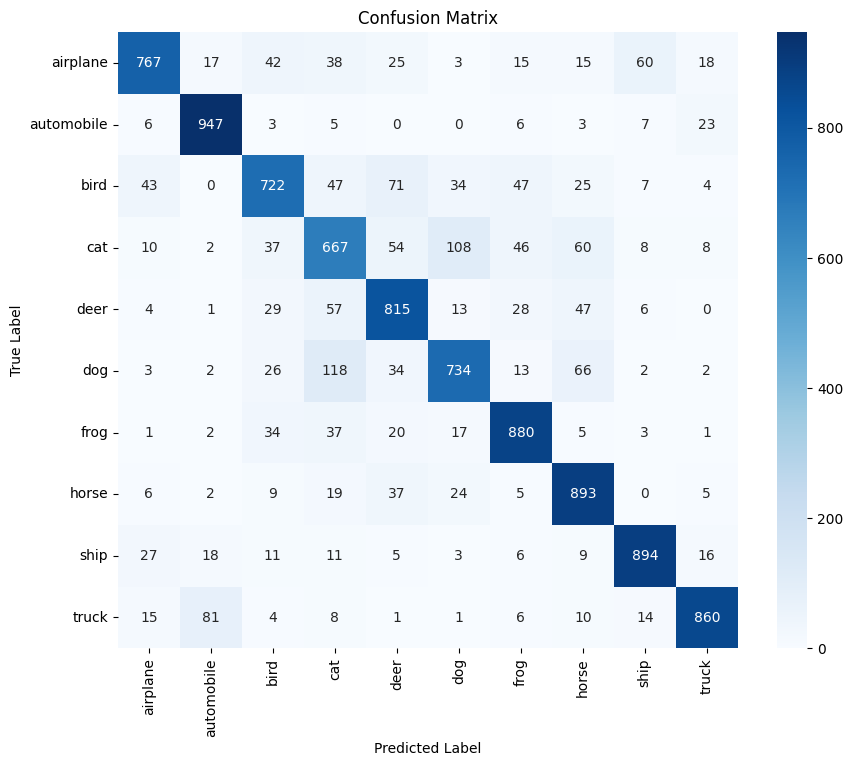

In [8]:
# Confusion Matrix
evaluation_matrix(model, x_test, y_test)

## Model training with Regularization

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)       

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


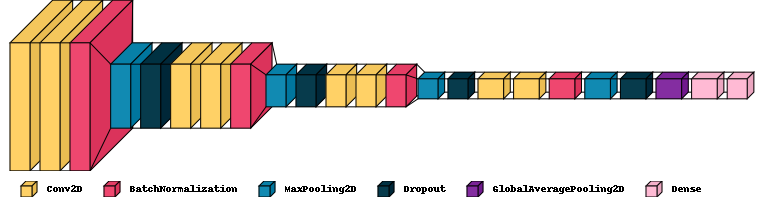

In [10]:
# Model creation and visualization
regularized_model = create_regularized_model()
regularized_model.summary()
visualize_model(regularized_model)

In [11]:
# Training
history_regularized = train_regularized_model(regularized_model, train_dataset=train_dataset,x_val=x_val, y_val=y_val)

Epoch 1/50
704/704 [==============================] - 12s 16ms/step - loss: 2.2231 - accuracy: 0.3951 - val_loss: 1.5524 - val_accuracy: 0.4804 - lr: 0.0010
Epoch 2/50
704/704 [==============================] - 11s 16ms/step - loss: 1.2710 - accuracy: 0.5647 - val_loss: 1.2234 - val_accuracy: 0.5826 - lr: 0.0010
Epoch 3/50
704/704 [==============================] - 12s 16ms/step - loss: 1.0681 - accuracy: 0.6386 - val_loss: 0.9043 - val_accuracy: 0.6882 - lr: 0.0010
Epoch 4/50
704/704 [==============================] - 12s 16ms/step - loss: 0.9417 - accuracy: 0.6872 - val_loss: 0.9425 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 5/50
704/704 [==============================] - 12s 17ms/step - loss: 0.8654 - accuracy: 0.7134 - val_loss: 0.9002 - val_accuracy: 0.7056 - lr: 0.0010
Epoch 6/50
704/704 [==============================] - 11s 16ms/step - loss: 0.8065 - accuracy: 0.7358 - val_loss: 0.9038 - val_accuracy: 0.7130 - lr: 0.0010
Epoch 7/50
704/704 [==============================] - 11s 

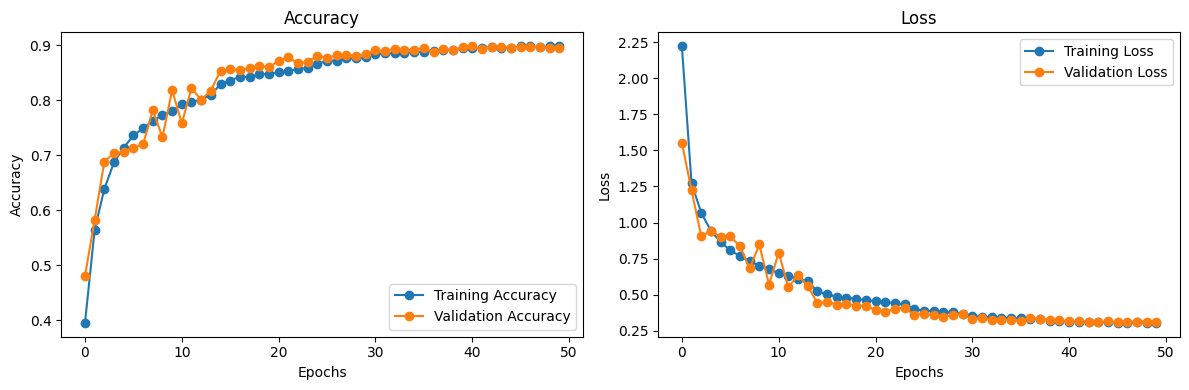

In [12]:
# Training/Validation Curves
plot_history(history_regularized)

In [13]:
# Accuracy evaluation
evaluate_model(regularized_model, x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3435 - accuracy: 0.8914
Test Loss: 0.34350958466529846, Test Accuracy: 0.8913999795913696


In [14]:
# Precision, recall, and F1 score
evaluation_report(regularized_model, x_test, y_test)

313/313 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.92      0.89      0.91      1000
  automobile       0.95      0.95      0.95      1000
        bird       0.88      0.86      0.87      1000
         cat       0.82      0.71      0.76      1000
        deer       0.85      0.89      0.87      1000
         dog       0.82      0.84      0.83      1000
        frog       0.90      0.94      0.92      1000
       horse       0.93      0.92      0.93      1000
        ship       0.92      0.96      0.94      1000
       truck       0.93      0.95      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



313/313 [==============================] - 1s 3ms/step


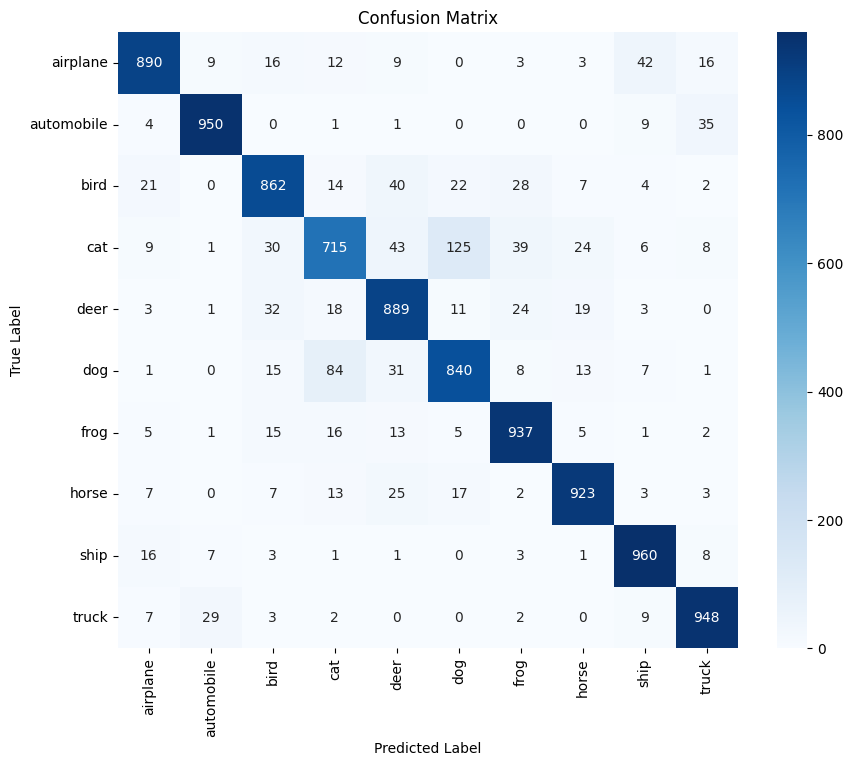

In [15]:
# Confusion Matrix
evaluation_matrix(regularized_model, x_test, y_test)

# Hyperparamater Tuning

In [3]:
best_hps, best_model = tune_hyperparameters(train_dataset, x_val, y_val)

Trial 20 Complete [00h 01m 30s]
val_accuracy: 0.7781999707221985

Best val_accuracy So Far: 0.7868000268936157
Total elapsed time: 00h 36m 01s


In [4]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [6]:
history_best = train_regularized_model(best_model, train_dataset, x_val, y_val)

Epoch 1/50
704/704 [==============================] - 12s 15ms/step - loss: 0.6649 - accuracy: 0.7709 - val_loss: 0.6859 - val_accuracy: 0.7642 - lr: 0.0010
Epoch 2/50
704/704 [==============================] - 10s 14ms/step - loss: 0.6383 - accuracy: 0.7815 - val_loss: 0.6174 - val_accuracy: 0.7914 - lr: 0.0010
Epoch 3/50
704/704 [==============================] - 10s 14ms/step - loss: 0.6142 - accuracy: 0.7890 - val_loss: 0.5880 - val_accuracy: 0.8006 - lr: 0.0010
Epoch 4/50
704/704 [==============================] - 10s 14ms/step - loss: 0.5921 - accuracy: 0.7962 - val_loss: 0.6188 - val_accuracy: 0.7932 - lr: 0.0010
Epoch 5/50
704/704 [==============================] - 10s 14ms/step - loss: 0.5753 - accuracy: 0.8013 - val_loss: 0.5727 - val_accuracy: 0.8064 - lr: 0.0010
Epoch 6/50
704/704 [==============================] - 10s 14ms/step - loss: 0.5604 - accuracy: 0.8083 - val_loss: 0.5608 - val_accuracy: 0.8100 - lr: 0.0010
Epoch 7/50
704/704 [==============================] - 10s 

In [9]:
evaluate_model(best_model, x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4800 - accuracy: 0.8532
Test Loss: 0.4799744188785553, Test Accuracy: 0.8532000184059143
